In [1]:
import os
import numpy as np
#import nibabel as nib
#from nibabel.testing import data_path
import glob
#import skimage.io as io
from matplotlib import pyplot as plt
import cv2
#from skimage.exposure import rescale_intensity
#import pydicom
import shutil

In [ ]:
# pip install numpy
# pip install nibabel
# pip install scikit-image
# 

In [2]:
def display(image, display_min, display_max): 
    image = np.array(image, copy=True)
    image.clip(display_min, display_max, out=image)
    image -= display_min
    np.floor_divide(image, (display_max - display_min + 1) / 256, out=image, casting='unsafe')
    return image.astype(np.uint8)

def lut_display(image, display_min, display_max) :
    lut = np.arange(2**16, dtype='uint16')
    lut = display(lut, display_min, display_max)
    return np.take(lut, image)

In [6]:
data_path = 'E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed'
prepared_data_path_image = 'E:/Project/Data/image2/'
prepared_data_path_label = 'E:/Project/Data/label/'

if not os.path.exists(prepared_data_path_image):
    os.makedirs(prepared_data_path_image)
    
if not os.path.exists(prepared_data_path_label):
    os.makedirs(prepared_data_path_label)
                
folders_path_arr = glob.glob(os.path.join(data_path,"*"))

for i in range(len(folders_path_arr)):
    images_path_arr = glob.glob(os.path.join(folders_path_arr[i],"*.dcm"))
    labels_path_arr = glob.glob(os.path.join(folders_path_arr[i],"*.nii.gz"))
    patient_folder_name = os.path.basename(folders_path_arr[i])
    
    for j in range(len(images_path_arr)):
        dcm_img = pydicom.dcmread(images_path_arr[j])
        print(images_path_arr[j])
        
        img_16bit = dcm_img.pixel_array
        
        minIntensity = np.min(img_16bit)
        maxIntensity = np.max(img_16bit)
        img_8bit = lut_display(img_16bit, minIntensity, maxIntensity)
        
        img_8bit = (255-img_8bit)
        
        if dcm_img.ImageLaterality == 'R':
            img_8bit[689:1090, 566:1323] = 0
        else:
            img_8bit[689:1127, 3376:4180] = 0
        
        img_basename = os.path.basename(images_path_arr[j])
        img_name = (os.path.splitext(img_basename)[0])[9:]
        
        if not os.path.exists(prepared_data_path_image + patient_folder_name):
            os.makedirs(prepared_data_path_image + patient_folder_name)
        
        cv2.imwrite(prepared_data_path_image + patient_folder_name + '/' + img_name + '.png', img_8bit)
"""
    for j in range(len(labels_path_arr)):
        nii_label = nib.load(labels_path_arr[j])
        print(labels_path_arr[j])
        
        label_3d = nii_label.get_fdata()
        label = np.rot90((np.flip((np.squeeze(label_3d, axis=2)), 1)), 1)
         
        label_rescaled = label*255
        
        label_basename = os.path.basename(labels_path_arr[j])
        label_name = (os.path.splitext(label_basename)[0])
        label_name = (os.path.splitext(label_name)[0])[9:]
        if '-' in label_name:
            label_name = label_name[:label_name.find('-')]
        else:
            label_name = label_name[:label_name.lower().find('b')]
        
        if not os.path.exists(prepared_data_path_label + patient_folder_name):
            os.makedirs(prepared_data_path_label + patient_folder_name)
        
        cv2.imwrite(prepared_data_path_label + patient_folder_name + '/' + label_name + '.png', label_rescaled)
"""  
        # added to make gt for measuring similarity between student annotation and gt
#        StudyInstanceUID = dcm_img.StudyInstanceUID
#        cv2.imwrite(prepared_data_path + patient_folder_name + '/' + StudyInstanceUID + '.png', label_rescaled)


# agar img va label nomi bir xil bo'lsa bajar yoki yo'q

#io.imshow(img_8bit)

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64902600517.3516499\PRIMARY1_1.2.392.200036.9125.4.0.1410287079.1124140392.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64902600517.3516499\PRIMARY1_1.2.392.200036.9125.4.0.1410287079.1208026472.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64902600517.3516499\PRIMARY1_1.2.392.200036.9125.4.0.1410287079.1291912552.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64902600517.3516499\PRIMARY1_1.2.392.200036.9125.4.0.1410287079.1375798632.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928514821.3480129\PRIMARY1_1.2.392.200036.9125.4.0.3759080787.1392510312.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928514821.348

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928606731.3488380\PRIMARY1_1.2.392.200036.9125.4.0.3775859642.4160750952.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928606731.3488380\PRIMARY1_1.2.392.200036.9125.4.0.3775859642.4244637032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928680234.354010\PRIMARY1_1.2.392.200036.9125.4.0.3792644825.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928680234.354010\PRIMARY1_1.2.392.200036.9125.4.0.3792644825.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928680234.354010\PRIMARY1_1.2.392.200036.9125.4.0.3792644825.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928680234.354010\PR

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928864917.352084\PRIMARY1_1.2.392.200036.9125.4.0.3843003818.1023411560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928864917.352084\PRIMARY1_1.2.392.200036.9125.4.0.3843003818.1107297640.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928864917.352084\PRIMARY1_1.2.392.200036.9125.4.0.3843003818.855639400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928864917.352084\PRIMARY1_1.2.392.200036.9125.4.0.3843003818.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928865702.3520121\PRIMARY1_1.2.392.200036.9125.4.0.3843008173.1258292584.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928865702.3520121\P

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929029899.341647\PRIMARY1_1.2.392.200036.9125.4.0.3893300015.704644456.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929036940.341684\PRIMARY1_1.2.392.200036.9125.4.0.3893333066.1023411560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929036940.341684\PRIMARY1_1.2.392.200036.9125.4.0.3893333066.1107297640.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929036940.341684\PRIMARY1_1.2.392.200036.9125.4.0.3893333066.855639400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929036940.341684\PRIMARY1_1.2.392.200036.9125.4.0.3893333066.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929113369.334810\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929463224.3524121\PRIMARY1_1.2.392.200036.9125.4.0.3994007755.1426064744.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929463224.3524121\PRIMARY1_1.2.392.200036.9125.4.0.3994007755.1509950824.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929464540.3524158\PRIMARY1_1.2.392.200036.9125.4.0.3994016976.1660945768.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929464540.3524158\PRIMARY1_1.2.392.200036.9125.4.0.3994016976.1744831848.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929464540.3524158\PRIMARY1_1.2.392.200036.9125.4.0.3994016976.1828717928.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929464540.352

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929809608.3544121\PRIMARY1_1.2.392.200036.9125.4.0.4094674964.1342178664.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929809608.3544121\PRIMARY1_1.2.392.200036.9125.4.0.4094674964.1426064744.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929809608.3544121\PRIMARY1_1.2.392.200036.9125.4.0.4094674964.1509950824.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929811513.3544195\PRIMARY1_1.2.392.200036.9125.4.0.4094638364.2063598952.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929811513.3544195\PRIMARY1_1.2.392.200036.9125.4.0.4094638364.2147485032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64929811513.354

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930070781.3516158\PRIMARY1_1.2.392.200036.9125.4.0.4161797392.1660945768.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930070781.3516158\PRIMARY1_1.2.392.200036.9125.4.0.4161797392.1744831848.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930070781.3516158\PRIMARY1_1.2.392.200036.9125.4.0.4161797392.1828717928.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930070781.3516158\PRIMARY1_1.2.392.200036.9125.4.0.4161797392.1912604008.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930072256.3516195\PRIMARY1_1.2.392.200036.9125.4.0.4161781782.2063598952.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930072256.351

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930331302.348884\PRIMARY1_1.2.392.200036.9125.4.0.4228883978.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930334984.355210\PRIMARY1_1.2.392.200036.9125.4.0.4228843545.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930334984.355210\PRIMARY1_1.2.392.200036.9125.4.0.4228843545.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930334984.355210\PRIMARY1_1.2.392.200036.9125.4.0.4228843545.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930334984.355210\PRIMARY1_1.2.392.200036.9125.4.0.4228843545.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930337203.355255\PRIMARY

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930499257.3536158\PRIMARY1_1.2.392.200036.9125.4.0.4262443418.1828717928.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930499257.3536158\PRIMARY1_1.2.392.200036.9125.4.0.4262443418.1912604008.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930754237.346010\PRIMARY1_1.2.392.200036.9125.4.0.34585982.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930754237.346010\PRIMARY1_1.2.392.200036.9125.4.0.34586238.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930754237.346010\PRIMARY1_1.2.392.200036.9125.4.0.34586238.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930754237.346010\PRIMARY1_

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930850900.3536195\PRIMARY1_1.2.392.200036.9125.4.0.51336440.2147485032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930850900.3536195\PRIMARY1_1.2.392.200036.9125.4.0.51336440.2231371112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930850900.3536195\PRIMARY1_1.2.392.200036.9125.4.0.51336440.2315257192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930851177.3536232\PRIMARY1_1.2.392.200036.9125.4.0.51341817.2466252136.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930851177.3536232\PRIMARY1_1.2.392.200036.9125.4.0.51341817.2550138216.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64930851177.3536232\PRIMA

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931025841.3456158\PRIMARY1_1.2.392.200036.9125.4.0.101691811.1660945768.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931025841.3456158\PRIMARY1_1.2.392.200036.9125.4.0.101691811.1744831848.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931025841.3456158\PRIMARY1_1.2.392.200036.9125.4.0.101691811.1828717928.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931025841.3456158\PRIMARY1_1.2.392.200036.9125.4.0.101691811.1912604008.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931027477.3456195\PRIMARY1_1.2.392.200036.9125.4.0.101651882.2063598952.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931027477.3456195\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931284583.3508269\PRIMARY1_1.2.392.200036.9125.4.0.168781718.3120563560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931285183.3508306\PRIMARY1_1.2.392.200036.9125.4.0.168804248.3271558504.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931285183.3508306\PRIMARY1_1.2.392.200036.9125.4.0.168804248.3355444584.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931285183.3508306\PRIMARY1_1.2.392.200036.9125.4.0.168804248.3439330664.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931285183.3508306\PRIMARY1_1.2.392.200036.9125.4.0.168804248.3523216744.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931359986.356410\P

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931535500.356084\PRIMARY1_1.2.392.200036.9125.4.0.235900010.855639400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931535500.356084\PRIMARY1_1.2.392.200036.9125.4.0.235900010.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931537126.3560121\PRIMARY1_1.2.392.200036.9125.4.0.235923056.1258292584.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931537126.3560121\PRIMARY1_1.2.392.200036.9125.4.0.235923056.1342178664.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931537126.3560121\PRIMARY1_1.2.392.200036.9125.4.0.235923312.1426064744.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931537126.3560121\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931706066.363684\PRIMARY1_1.2.392.200036.9125.4.0.286249476.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931706066.363684\PRIMARY1_1.2.392.200036.9125.4.0.286249732.1023411560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931706066.363684\PRIMARY1_1.2.392.200036.9125.4.0.286249732.1107297640.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931710007.3636152\PRIMARY1_1.2.392.200036.9125.4.0.286209812.1560282472.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931710007.3636152\PRIMARY1_1.2.392.200036.9125.4.0.286209812.1644168552.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931710007.3636152\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931972975.3516241\PRIMARY1_1.2.392.200036.9125.4.0.353333015.2566915432.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931972975.3516241\PRIMARY1_1.2.392.200036.9125.4.0.353333015.2650801512.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931972975.3516241\PRIMARY1_1.2.392.200036.9125.4.0.353333015.2734687592.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931972975.3516241\PRIMARY1_1.2.392.200036.9125.4.0.353333015.2818573672.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931974275.3516307\PRIMARY1_1.2.392.200036.9125.4.0.353307419.2969568616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64931974275.3516307\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932230988.3532158\PRIMARY1_1.2.392.200036.9125.4.0.420432903.1912604008.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932231769.3532195\PRIMARY1_1.2.392.200036.9125.4.0.420436234.2063598952.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932231769.3532195\PRIMARY1_1.2.392.200036.9125.4.0.420436234.2147485032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932231769.3532195\PRIMARY1_1.2.392.200036.9125.4.0.420436234.2231371112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932231769.3532195\PRIMARY1_1.2.392.200036.9125.4.0.420436234.2315257192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932232161.3532232\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932320668.3616232\PRIMARY1_1.2.392.200036.9125.4.0.437230693.2634024296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932320668.3616232\PRIMARY1_1.2.392.200036.9125.4.0.437230693.2717910376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932321703.3616269\PRIMARY1_1.2.392.200036.9125.4.0.437233513.2868905320.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932321703.3616269\PRIMARY1_1.2.392.200036.9125.4.0.437233513.2952791400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932321703.3616269\PRIMARY1_1.2.392.200036.9125.4.0.437233513.3036677480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932321703.3616269\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932741600.355647\PRIMARY1_1.2.392.200036.9125.4.0.537911505.536872296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932741600.355647\PRIMARY1_1.2.392.200036.9125.4.0.537911505.620758376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932741600.355647\PRIMARY1_1.2.392.200036.9125.4.0.537911505.704644456.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932743373.3556104\PRIMARY1_1.2.392.200036.9125.4.0.537906648.1191183720.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932743373.3556104\PRIMARY1_1.2.392.200036.9125.4.0.537906648.1275069800.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932743373.3556104\PRIMAR

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932915912.353672\PRIMARY1_1.2.392.200036.9125.4.0.588236922.1040188776.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932915912.353672\PRIMARY1_1.2.392.200036.9125.4.0.588236922.788530536.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932915912.353672\PRIMARY1_1.2.392.200036.9125.4.0.588236922.872416616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932915912.353672\PRIMARY1_1.2.392.200036.9125.4.0.588236922.956302696.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932917107.3536121\PRIMARY1_1.2.392.200036.9125.4.0.588215167.1258292584.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932917107.3536121\PRIMARY

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932925778.3536698\PRIMARY1_1.2.392.200036.9125.4.0.588206753.4244702568.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932926168.3536735\PRIMARY1_1.2.392.200036.9125.4.0.588241058.352453992.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932926168.3536735\PRIMARY1_1.2.392.200036.9125.4.0.588241058.436340072.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932926168.3536735\PRIMARY1_1.2.392.200036.9125.4.0.588241058.520226152.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932926168.3536735\PRIMARY1_1.2.392.200036.9125.4.0.588241058.604112232.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64932928976.3536832\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088043.348810\PRIMARY1_1.2.392.200036.9125.4.0.638528283.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088043.348810\PRIMARY1_1.2.392.200036.9125.4.0.638528283.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088491.348847\PRIMARY1_1.2.392.200036.9125.4.0.638577436.452986216.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088491.348847\PRIMARY1_1.2.392.200036.9125.4.0.638577436.536872296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088491.348847\PRIMARY1_1.2.392.200036.9125.4.0.638577436.620758376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933088491.348847\PRIMARY1_1.2

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933436068.3508135\PRIMARY1_1.2.392.200036.9125.4.0.722445418.1644168552.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933436068.3508135\PRIMARY1_1.2.392.200036.9125.4.0.722445418.1728054632.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933436068.3508135\PRIMARY1_1.2.392.200036.9125.4.0.722445674.1811940712.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933439821.3508210\PRIMARY1_1.2.392.200036.9125.4.0.722423161.2499806568.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933439821.3508210\PRIMARY1_1.2.392.200036.9125.4.0.722423161.2583692648.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933439821.3508210\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933533210.3560436\PRIMARY1_1.2.392.200036.9125.4.0.739187430.1023477096.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933533210.3560436\PRIMARY1_1.2.392.200036.9125.4.0.739187430.1107363176.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933533210.3560436\PRIMARY1_1.2.392.200036.9125.4.0.739187430.1191249256.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933533210.3560436\PRIMARY1_1.2.392.200036.9125.4.0.739187430.1275135336.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933691950.358010\PRIMARY1_1.2.392.200036.9125.4.0.789524050.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933691950.358010\PRI

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933867745.344810\PRIMARY1_1.2.392.200036.9125.4.0.839901696.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933869169.344878\PRIMARY1_1.2.392.200036.9125.4.0.839872774.754976104.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933869169.344878\PRIMARY1_1.2.392.200036.9125.4.0.839872774.838862184.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933869169.344878\PRIMARY1_1.2.392.200036.9125.4.0.839873030.1006634344.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933869169.344878\PRIMARY1_1.2.392.200036.9125.4.0.839873030.922748264.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933869580.3448115\PRIMARY1_

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933961021.3472104\PRIMARY1_1.2.392.200036.9125.4.0.856636781.1358955880.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933961021.3472104\PRIMARY1_1.2.392.200036.9125.4.0.856636781.1442841960.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933962820.3472141\PRIMARY1_1.2.392.200036.9125.4.0.856638580.1593836904.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933962820.3472141\PRIMARY1_1.2.392.200036.9125.4.0.856638836.1677722984.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933962820.3472141\PRIMARY1_1.2.392.200036.9125.4.0.856638836.1761609064.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64933962820.3472141\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934213818.349210\PRIMARY1_1.2.392.200036.9125.4.0.923777608.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934222274.349267\PRIMARY1_1.2.392.200036.9125.4.0.923779689.1040188776.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934222274.349267\PRIMARY1_1.2.392.200036.9125.4.0.923779689.788530536.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934222274.349267\PRIMARY1_1.2.392.200036.9125.4.0.923779689.872416616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934222274.349267\PRIMARY1_1.2.392.200036.9125.4.0.923779689.956302696.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64934226014.353210\PRIMARY1_1.

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64935858832.336410\PRIMARY1_1.2.392.200036.9125.4.0.1343197282.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64935858832.336410\PRIMARY1_1.2.392.200036.9125.4.0.1343197282.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64936028303.357684\PRIMARY1_1.2.392.200036.9125.4.0.1376751608.1023411560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64936028303.357684\PRIMARY1_1.2.392.200036.9125.4.0.1376751608.1107297640.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64936028303.357684\PRIMARY1_1.2.392.200036.9125.4.0.1376751608.855639400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64936028303.357684\PRIMA

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938450800.354847\PRIMARY1_1.2.392.200036.9125.4.0.1997500655.536872296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938450800.354847\PRIMARY1_1.2.392.200036.9125.4.0.1997500655.620758376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938450800.354847\PRIMARY1_1.2.392.200036.9125.4.0.1997500655.704644456.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938535693.354047\PRIMARY1_1.2.392.200036.9125.4.0.2031029563.452986216.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938535693.354047\PRIMARY1_1.2.392.200036.9125.4.0.2031029563.536872296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64938535693.354047\PRIMAR

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939394894.353610\PRIMARY1_1.2.392.200036.9125.4.0.2249150039.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939394894.353610\PRIMARY1_1.2.392.200036.9125.4.0.2249150039.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939394894.353610\PRIMARY1_1.2.392.200036.9125.4.0.2249150039.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939394894.353610\PRIMARY1_1.2.392.200036.9125.4.0.2249150039.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939401720.353647\PRIMARY1_1.2.392.200036.9125.4.0.2249193585.452986216.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64939401720.353647\PRIMARY

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940090121.352084\PRIMARY1_1.2.392.200036.9125.4.0.2416904691.939525480.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940094516.3520121\PRIMARY1_1.2.392.200036.9125.4.0.2433692676.1258292584.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940094516.3520121\PRIMARY1_1.2.392.200036.9125.4.0.2433692676.1342178664.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940094516.3520121\PRIMARY1_1.2.392.200036.9125.4.0.2433692932.1426064744.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940094516.3520121\PRIMARY1_1.2.392.200036.9125.4.0.2433692932.1509950824.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940094796.35201

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940270313.3564232\PRIMARY1_1.2.392.200036.9125.4.0.2467293618.2717910376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940430241.353247\PRIMARY1_1.2.392.200036.9125.4.0.2517606691.452986216.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940430241.353247\PRIMARY1_1.2.392.200036.9125.4.0.2517606691.536872296.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940430241.353247\PRIMARY1_1.2.392.200036.9125.4.0.2517606691.620758376.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940430241.353247\PRIMARY1_1.2.392.200036.9125.4.0.2517606691.704644456.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940612231.340010\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941304090.349632\PRIMARY1_1.2.392.200036.9125.4.0.2735676025.419431784.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941304090.349632\PRIMARY1_1.2.392.200036.9125.4.0.2735676025.503317864.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941481427.352084\PRIMARY1_1.2.392.200036.9125.4.0.2786054957.1023411560.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941481427.352084\PRIMARY1_1.2.392.200036.9125.4.0.2786054957.1107297640.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941481427.352084\PRIMARY1_1.2.392.200036.9125.4.0.2786054957.855639400.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64941481427.352084\PRIM

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942076888.353272\PRIMARY1_1.2.392.200036.9125.4.0.2937051459.1040188776.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942076888.353272\PRIMARY1_1.2.392.200036.9125.4.0.2937051459.872416616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942076888.353272\PRIMARY1_1.2.392.200036.9125.4.0.2937051459.956302696.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942077309.3532105\PRIMARY1_1.2.392.200036.9125.4.0.2937027909.1191183720.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942248343.356410\PRIMARY1_1.2.392.200036.9125.4.0.2970589153.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942248343.356410\PRI

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942681810.356010\PRIMARY1_1.2.392.200036.9125.4.0.3088044670.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942767469.321210\PRIMARY1_1.2.392.200036.9125.4.0.3104795853.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942767469.321210\PRIMARY1_1.2.392.200036.9125.4.0.3104796109.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942767469.321210\PRIMARY1_1.2.392.200036.9125.4.0.3104796109.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942767469.321210\PRIMARY1_1.2.392.200036.9125.4.0.3104796109.301991272.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64942773192.321279\PRIMARY1

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943038514.3540211\PRIMARY1_1.2.392.200036.9125.4.0.3171889904.2583692648.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943038514.3540211\PRIMARY1_1.2.392.200036.9125.4.0.3171889904.2667578728.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943038514.3540211\PRIMARY1_1.2.392.200036.9125.4.0.3171889904.2751464808.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943282410.354010\PRIMARY1_1.2.392.200036.9125.4.0.3239045800.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943282410.354010\PRIMARY1_1.2.392.200036.9125.4.0.3239045800.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943282410.354010\

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943543956.3512104\PRIMARY1_1.2.392.200036.9125.4.0.3306132646.1191183720.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943543956.3512104\PRIMARY1_1.2.392.200036.9125.4.0.3306132902.1275069800.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943543956.3512104\PRIMARY1_1.2.392.200036.9125.4.0.3306132902.1358955880.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943543956.3512104\PRIMARY1_1.2.392.200036.9125.4.0.3306132902.1442841960.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943545328.3512141\PRIMARY1_1.2.392.200036.9125.4.0.3306156203.1593836904.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64943545328.351

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944064484.349210\PRIMARY1_1.2.392.200036.9125.4.0.3440370839.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944067234.349267\PRIMARY1_1.2.392.200036.9125.4.0.3440353954.1040188776.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944067234.349267\PRIMARY1_1.2.392.200036.9125.4.0.3440353954.788530536.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944067234.349267\PRIMARY1_1.2.392.200036.9125.4.0.3440353954.872416616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944067234.349267\PRIMARY1_1.2.392.200036.9125.4.0.3440353954.956302696.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64944069224.3492104\PRIMA

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946746655.353267\PRIMARY1_1.2.392.200036.9125.4.0.4128186245.872416616.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946746655.353267\PRIMARY1_1.2.392.200036.9125.4.0.4128186245.956302696.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946836752.353610\PRIMARY1_1.2.392.200036.9125.4.0.4144959717.134219112.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946836752.353610\PRIMARY1_1.2.392.200036.9125.4.0.4144959717.218105192.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946836752.353610\PRIMARY1_1.2.392.200036.9125.4.0.4144959717.50333032.499806029.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64946836752.353610\PRIMARY

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929201845.352047\PRIMARY1_1.2.392.200036.9125.4.0.3926898126.453027904.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929201845.352047\PRIMARY1_1.2.392.200036.9125.4.0.3926898126.536913984.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929201845.352047\PRIMARY1_1.2.392.200036.9125.4.0.3926898126.620800064.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929201845.352047\PRIMARY1_1.2.392.200036.9125.4.0.3926898126.704686144.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929205138.352084\PRIMARY1_1.2.392.200036.9125.4.0.3926889179.1023453248.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929205138.3

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929730932.3508232\PRIMARY1_1.2.392.200036.9125.4.0.4061099233.2634065984.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64929730932.3508232\PRIMARY1_1.2.392.200036.9125.4.0.4061099233.2717952064.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64930667104.327210\PRIMARY1_1.2.392.200036.9125.4.0.17784874.50374720.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64930667104.327210\PRIMARY1_1.2.392.200036.9125.4.0.17785130.134260800.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64930667104.327210\PRIMARY1_1.2.392.200036.9125.4.0.17785130.218146880.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64930667104.32721

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64932055035.3532121\PRIMARY1_1.2.392.200036.9125.4.0.370146135.1258334272.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64932055035.3532121\PRIMARY1_1.2.392.200036.9125.4.0.370146135.1342220352.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64932055035.3532121\PRIMARY1_1.2.392.200036.9125.4.0.370146135.1426106432.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64932055035.3532121\PRIMARY1_1.2.392.200036.9125.4.0.370146135.1509992512.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64932061814.3532158\PRIMARY1_1.2.392.200036.9125.4.0.370112114.1660987456.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.649320618

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933273586.3572446\PRIMARY1_1.2.392.200036.9125.4.0.672077553.1912711232.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933273586.3572446\PRIMARY1_1.2.392.200036.9125.4.0.672089585.1996597312.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933608425.354810\PRIMARY1_1.2.392.200036.9125.4.0.772794635.134260800.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933608425.354810\PRIMARY1_1.2.392.200036.9125.4.0.772794635.218146880.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933608425.354810\PRIMARY1_1.2.392.200036.9125.4.0.772794635.302032960.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64933608425.354

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64942512370.3504149\PRIMARY1_1.2.392.200036.9125.4.0.3037721320.1862314048.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64942512370.3504149\PRIMARY1_1.2.392.200036.9125.4.0.3037721320.1946200128.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64942512370.3504149\PRIMARY1_1.2.392.200036.9125.4.0.3037721320.2030086208.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64942512370.3504149\PRIMARY1_1.2.392.200036.9125.4.0.3037721576.2113972288.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.64942512739.3504186\PRIMARY1_1.2.392.200036.9125.4.0.3037684714.2264967232.1525701362.dcm
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.641682409024290.6494

"\n    for j in range(len(labels_path_arr)):\n        nii_label = nib.load(labels_path_arr[j])\n        print(labels_path_arr[j])\n        \n        label_3d = nii_label.get_fdata()\n        label = np.rot90((np.flip((np.squeeze(label_3d, axis=2)), 1)), 1)\n         \n        label_rescaled = label*255\n        \n        label_basename = os.path.basename(labels_path_arr[j])\n        label_name = (os.path.splitext(label_basename)[0])\n        label_name = (os.path.splitext(label_name)[0])[9:]\n        if '-' in label_name:\n            label_name = label_name[:label_name.find('-')]\n        else:\n            label_name = label_name[:label_name.lower().find('b')]\n        \n        if not os.path.exists(prepared_data_path_label + patient_folder_name):\n            os.makedirs(prepared_data_path_label + patient_folder_name)\n        \n        cv2.imwrite(prepared_data_path_label + patient_folder_name + '/' + label_name + '.png', label_rescaled)\n"

In [29]:
data_path = 'E:/Project/Data/image/'
prepared_data_path_mask = 'E:/Project/Data/mask/'


if not os.path.exists(prepared_data_path_mask):
    os.makedirs(prepared_data_path_mask)
                
folders_path_arr = glob.glob(os.path.join(data_path,"*"))


for i in range(len(folders_path_arr)):
    images_path_arr = glob.glob(os.path.join(folders_path_arr[i],"*"))
    
    patient_folder_name = os.path.basename(folders_path_arr[i])
    
    for j in range(len(images_path_arr)):
        img = cv2.imread(images_path_arr[j],0)
        # binarize the image
        ret,thresh1 = cv2.threshold(img,6,255,cv2.THRESH_BINARY)
        #then erosion
        kernel = np.ones((30,30),np.uint8)
        erosion = cv2.erode(thresh1,kernel,iterations = 1)
        
        kernel = np.ones((100,100),np.uint8)
        closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)
        
        img_basename = os.path.basename(images_path_arr[j])
        
        if not os.path.exists(prepared_data_path_mask + patient_folder_name):
            os.makedirs(prepared_data_path_mask + patient_folder_name)
        
        cv2.imwrite(prepared_data_path_mask + patient_folder_name + '/' + img_basename, closing)
        
        

In [7]:
#dcm_file = pydicom.dcmread('image1.dcm')
#img = dcm_file.pixel_array

# create the mask and save it, the first one is more powerful than the second one
#mask =  np.asarray((img>0)*255 , dtype = np.uint8) # = type(img[0,0])
#cv2.imwrite('mask' + '.png', mask)

True

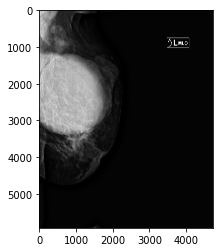

In [18]:
img = cv2.imread("image3.png",0)
plt.imshow(img, cmap="gray")

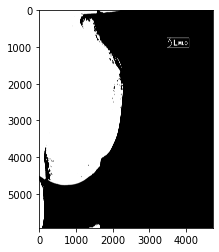

In [23]:
# binarize the image
ret,thresh1 = cv2.threshold(img,4,255,cv2.THRESH_BINARY)
#ret,thresh1 = cv2.threshold(img, 10, 255, 0)
plt.imshow(thresh1, cmap="gray")

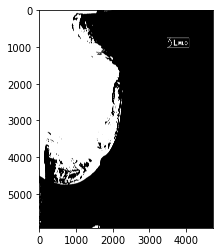

In [16]:
#use opening
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")

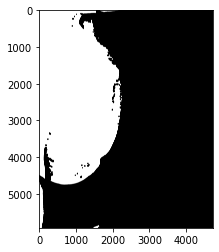

In [24]:
#then erosion
kernel = np.ones((30,30),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

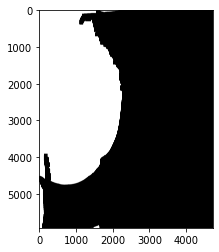

In [26]:
kernel = np.ones((100,100),np.uint8)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="gray")

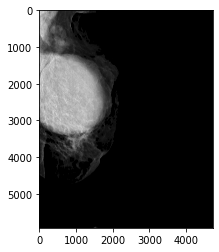

In [12]:
#then merge this mask with the original image
merged = cv2.bitwise_and(img, img , mask=erosion)
plt.imshow(merged, cmap="gray")

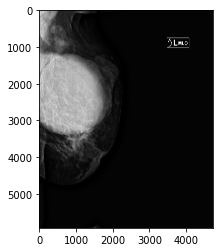

In [18]:
img = cv2.imread("image3.png",0)
plt.imshow(img, cmap="gray")

In [20]:
x,y,w,h = cv2.boundingRect(img)
print(w,h)
print(x,y)
img.shape

4728 5928
0 0


(5928, 4728)

In [10]:
image_path = 'E:/Project/Data/image2/'
label_path = 'E:/Project/Data/label/'
mass_path = 'E:/Project/Data/mass/'
nomass_path = 'E:/Project/Data/nomass/'

image_path_arr = glob.glob(os.path.join(image_path,"*"))

for i in range(len(image_path_arr)):
    for file in glob.glob(os.path.join(image_path_arr[i],"*")):
        dst = image_path + os.path.basename(file)
        shutil.move(file, dst)

In [3]:
data_path = 'E:/Project/Data/label/'
folders_path_arr = glob.glob(os.path.join(data_path,"*"))
for label in folders_path_arr:
    print(os.path.basename(label))

1.2.392.200036.9125.4.0.101691811.1660945768.499806029.png
1.2.392.200036.9125.4.0.101691811.1828717928.499806029.png
1.2.392.200036.9125.4.0.1024444921.1291847016.499806029.png
1.2.392.200036.9125.4.0.1024444921.1459619176.499806029.png
1.2.392.200036.9125.4.0.1074782623.1040188776.499806029.png
1.2.392.200036.9125.4.0.1074782623.872416616.499806029.png
1.2.392.200036.9125.4.0.118435046.1258292584.499806029.png
1.2.392.200036.9125.4.0.118435046.1426064744.499806029.png
1.2.392.200036.9125.4.0.118448115.1660945768.499806029.png
1.2.392.200036.9125.4.0.118448115.1744831848.499806029.png
1.2.392.200036.9125.4.0.118448115.1828717928.499806029.png
1.2.392.200036.9125.4.0.118448115.1912604008.499806029.png
1.2.392.200036.9125.4.0.1326408480.134219112.499806029.png
1.2.392.200036.9125.4.0.1326408480.301991272.499806029.png
1.2.392.200036.9125.4.0.1376751608.1023411560.499806029.png
1.2.392.200036.9125.4.0.1376751608.855639400.499806029.png
1.2.392.200036.9125.4.0.1544503616.134219112.4998060

Cut 299*299 image from whole image

In [5]:
image_path = 'E:/Project/INbreast/images/'
label_path = 'E:/Project/INbreast/groundtruth/'
mass_path = 'E:/Project/INbreast/mass/'
nomass_path = 'E:/Project/INbreast/nomass/'

image_path_arr = glob.glob(os.path.join(image_path,"*"))
label_path_arr = glob.glob(os.path.join(label_path,"*"))
image_list = os.listdir(image_path)
label_list = os.listdir(label_path)

stride_nomass = 300
stride_mass = 50
iteration = 0

for file_path in image_path_arr:
    img = cv2.imread(file_path,0)
    if os.path.basename(file_path) in label_list:
        label = cv2.imread(label_path + os.path.basename(file_path), 0)
    else:
        label = np.zeros(img.shape, dtype=int)
    
    height, width = img.shape
    img_name = os.path.splitext(os.path.basename(file_path))[0]
    
    # for no mass (410)
    for j in range(0, width-299, stride_nomass):
        for i in range(0, height-299, stride_nomass): # i = 0, 100, 200 ... 3029
            nomass = img[0+i:299+i, 0+j:299+j]  # [0:299, 0:299] , [100:]
            mass_label = label[0+i:299+i, 0+j:299+j]
            if np.sum(nomass == 0) == 0: # if no black pixel
                if np.sum(mass_label == 255) == 0: #if black pixel
                    cv2.imwrite(nomass_path + img_name + '_' + str(i) + '_' + str(j) + '.png', nomass)
                    
    # for mass (107)
    for j in range(0, width-299, stride_mass):
        for i in range(0, height-299, stride_mass): # i = 0, 100, 200 ... 3029
            mass = img[0+i:299+i, 0+j:299+j]  # [0:299, 0:299] , [100:]
            mass_label = label[0+i:299+i, 0+j:299+j]
            if np.sum(mass_label[100:200, 100:200] == 255) > 0: # if white pixel and mass centered, np.sum(mass_label == 255) > 0 && 
                cv2.imwrite(mass_path + img_name + '_' + str(i) + '_' + str(j) + '.png', mass)
    iteration = iteration + 1
    print("iteration: ", iteration)

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

Cut part of data (10000 mass and 20000 nomass)

In [2]:
from random import shuffle
mass_path = 'E:/Project/Data/mass/'
nomass_path = 'E:/Project/Data/nomass/'
dst_mass_path = 'E:/Project/Data/Dataset2/mass/'
dst_nomass_path = 'E:/Project/Data/Dataset2/nomass/'
mass_path_arr = glob.glob(os.path.join(mass_path, "*.png"))
nomass_path_arr = glob.glob(os.path.join(nomass_path, "*.png"))
shuffle(mass_path_arr)
shuffle(nomass_path_arr)

for i in range(10000):
    dst = dst_mass_path + os.path.basename(mass_path_arr[i])
    shutil.move(mass_path_arr[i], dst)

for i in range(20000):
    dst = dst_nomass_path + os.path.basename(nomass_path_arr[i])
    shutil.move(nomass_path_arr[i], dst)

In [6]:
from random import shuffle
mass_path = 'E:/Project/INbreast/mass/'
nomass_path = 'E:/Project/INbreast/nomass/'
dst_mass_path = 'E:/Project/INbreast/test5/mass/'
dst_nomass_path = 'E:/Project/INbreast/test5/nomass/'
mass_path_arr = glob.glob(os.path.join(mass_path, "*.png"))
nomass_path_arr = glob.glob(os.path.join(nomass_path, "*.png"))
shuffle(mass_path_arr)
shuffle(nomass_path_arr)

for i in range(409):
    dst = dst_mass_path + os.path.basename(mass_path_arr[i])
    shutil.move(mass_path_arr[i], dst)

for i in range(735):
    dst = dst_nomass_path + os.path.basename(nomass_path_arr[i])
    shutil.move(nomass_path_arr[i], dst)

In [5]:
image_path = 'E:/Project/Data/image2/'
label_path = 'E:/Project/Data/label/'
mass_path = 'E:/Project/Data/mass2/'


image_path_arr = glob.glob(os.path.join(image_path,"*"))
label_path_arr = glob.glob(os.path.join(label_path,"*"))
image_list = os.listdir(image_path)
label_list = os.listdir(label_path)

stride_mass = 100
iteration = 0

for file_path in image_path_arr:
    img = cv2.imread(file_path,0)
    if os.path.basename(file_path) in label_list:
        label = cv2.imread(label_path + os.path.basename(file_path), 0)
        
        height, width = img.shape
        img_name = os.path.splitext(os.path.basename(file_path))[0]
                             
        # for mass (107)
        for j in range(0, width-299, stride_mass):
            for i in range(0, height-299, stride_mass): # i = 0, 100, 200 ... 3029
                mass = img[0+i:299+i, 0+j:299+j]  # [0:299, 0:299] , [100:]
                mass_label = label[0+i:299+i, 0+j:299+j]
                if np.average(mass_label) == 255: # if white pixel 
                    cv2.imwrite(mass_path + img_name + '_' + str(i) + '_' + str(j) + '.png', mass)
    iteration = iteration + 1
    print("iteration: ", iteration)

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  520
iteration:  521
iteration:  522
iteration:  523
iteration:  524
iteration:  525
iteration:  526
iteration:  527
iteration:  528
iteration:  529
iteration:  530
iteration:  531
iteration:  532
iteration:  533
iteration:  534
iteration:  535
iteration:  536
iteration:  537
iteration:  538
iteration:  539
iteration:  540
iteration:  541
iteration:  542
iteration:  543
iteration:  544
iteration:  545
iteration:  546
iteration:  547
iteration:  548
iteration:  549
iteration:  550
iteration:  551
iteration:  552
iteration:  553
iteration:  554
iteration:  555
iteration:  556
iteration:  557
iteration:  558
iteration:  559
iteration:  560
iteration:  561
iteration:  562
iteration:  563
iteration:  564
iteration:  565
iteration:  566
iteration:  567
iteration:  568
iteration:  569
iteration:  570
iteration:  571
iteration:  572
iteration:  573
iteration:  574
iteration:  575
iteration:  576
iteration:  577
iteration:  578
iteration:  579
iteration:  580
iteration:  581
iteratio

iteration:  1031
iteration:  1032
iteration:  1033
iteration:  1034
iteration:  1035
iteration:  1036
iteration:  1037
iteration:  1038
iteration:  1039
iteration:  1040
iteration:  1041
iteration:  1042
iteration:  1043
iteration:  1044
iteration:  1045
iteration:  1046
iteration:  1047
iteration:  1048
iteration:  1049
iteration:  1050
iteration:  1051
iteration:  1052
iteration:  1053
iteration:  1054
iteration:  1055
iteration:  1056
iteration:  1057
iteration:  1058
iteration:  1059
iteration:  1060
iteration:  1061
iteration:  1062
iteration:  1063
iteration:  1064
iteration:  1065
iteration:  1066
iteration:  1067
iteration:  1068
iteration:  1069
iteration:  1070
iteration:  1071
iteration:  1072
iteration:  1073
iteration:  1074
iteration:  1075
iteration:  1076
iteration:  1077
iteration:  1078
iteration:  1079
iteration:  1080
iteration:  1081
iteration:  1082
iteration:  1083
iteration:  1084
iteration:  1085
iteration:  1086
iteration:  1087
iteration:  1088
iteration:  10

iteration:  1513
iteration:  1514
iteration:  1515
iteration:  1516
iteration:  1517
iteration:  1518
iteration:  1519
iteration:  1520
iteration:  1521
iteration:  1522
iteration:  1523
iteration:  1524
iteration:  1525
iteration:  1526
iteration:  1527
iteration:  1528
iteration:  1529
iteration:  1530
iteration:  1531
iteration:  1532
iteration:  1533
iteration:  1534
iteration:  1535
iteration:  1536
iteration:  1537
iteration:  1538
iteration:  1539
iteration:  1540
iteration:  1541
iteration:  1542
iteration:  1543
iteration:  1544
iteration:  1545
iteration:  1546
iteration:  1547
iteration:  1548
iteration:  1549
iteration:  1550
iteration:  1551
iteration:  1552
iteration:  1553
iteration:  1554
iteration:  1555
iteration:  1556
iteration:  1557
iteration:  1558
iteration:  1559
iteration:  1560
iteration:  1561
iteration:  1562
iteration:  1563
iteration:  1564
iteration:  1565
iteration:  1566
iteration:  1567
iteration:  1568
iteration:  1569
iteration:  1570
iteration:  15

iteration:  1995
iteration:  1996
iteration:  1997
iteration:  1998
iteration:  1999
iteration:  2000
iteration:  2001
iteration:  2002
iteration:  2003
iteration:  2004
iteration:  2005
iteration:  2006
iteration:  2007
iteration:  2008
iteration:  2009
iteration:  2010
iteration:  2011


In [6]:
from random import shuffle
mass_path = 'E:/Project/Data/mass2/'
dst_mass_path = 'E:/Project/Data/Dataset3/mass/'
mass_path_arr = glob.glob(os.path.join(mass_path, "*.png"))
shuffle(mass_path_arr)


for i in range(20000):
    dst = dst_mass_path + os.path.basename(mass_path_arr[i])
    shutil.move(mass_path_arr[i], dst)


In [8]:
from random import shuffle
mass_path = 'E:/Project/Data/mass2/'
dst_mass_path = 'E:/Project/Data/test2/mass/'
mass_path_arr = glob.glob(os.path.join(mass_path, "*.png"))
shuffle(mass_path_arr)


for i in range(1000):
    dst = dst_mass_path + os.path.basename(mass_path_arr[i])
    shutil.move(mass_path_arr[i], dst)

In [3]:
data_path = 'E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed'
              
folders_path_arr = glob.glob(os.path.join(data_path,"*"))

for i in range(len(folders_path_arr)):
    labels_path_arr = glob.glob(os.path.join(folders_path_arr[i],"*.nii.gz"))
    for label in labels_path_arr:
        print(label)

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928514821.3480129\PRIMARY1_1.2.392.200036.9125.4.0.3759080787.1560282472.499806029-B1.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928514821.3480129\PRIMARY1_1.2.392.200036.9125.4.0.3759080787.1644168552.499806029-B4a.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928603443.3488232\PRIMARY1_1.2.392.200036.9125.4.0.3775869869.2466252136.499806029-B4a.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928603443.3488232\PRIMARY1_1.2.392.200036.9125.4.0.3775869869.2634024296.499806029-B4a.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64928603874.3488269\PRIMARY1_1.2.392.200036.9125.4.0.3775914670.2868905320.499806029-B3.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125

E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940872933.3516121\PRIMARY1_1.2.392.200036.9125.4.0.2618287588.1258292584.499806029-B4b.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940872933.3516121\PRIMARY1_1.2.392.200036.9125.4.0.2618287844.1426064744.499806029-B4b.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940949477.354010\PRIMARY1_1.2.392.200036.9125.4.0.2651841807.134219112.499806029-B4b.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940949477.354010\PRIMARY1_1.2.392.200036.9125.4.0.2651841807.301991272.499806029-B4b.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.10452022977111.64940960330.354072\PRIMARY1_1.2.392.200036.9125.4.0.2651802170.788530536.499806029-B4b.nii.gz
E:\Project\Oncology_16.01.2020_15.08.2020_506p_fixed\1.2.392.200036.9125.3.1